In [18]:
import sys
from pathlib import Path

# 🔹 반드시 import 전에 sys.path 조정
root_path = Path().resolve().parent.parent
if str(root_path) not in sys.path:
    sys.path.insert(0, str(root_path))

import matplotlib.pyplot as plt
import pandas as pd
from typing import Callable, Tuple
from src.smoothing.simple_exp_smoothing import ses_forecast

def plot_ses_results(
    series: pd.Series,
    smoothing_level: float,
    forecast_periods: int,
    ses_func: Callable[[pd.Series, float, int], Tuple[pd.Series, pd.Series]],
    title: str = "Simple Exponential Smoothing"
) -> None:
    fitted, forecast = ses_func(series, smoothing_level,
                                forecast_periods)
    
    plt.figure(figsize=(10, 5))
    plt.plot(series, label="Original")
    plt.plot(fitted, label="Fitted")
    plt.plot(forecast, label="Forecast", linestyle="--")
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()


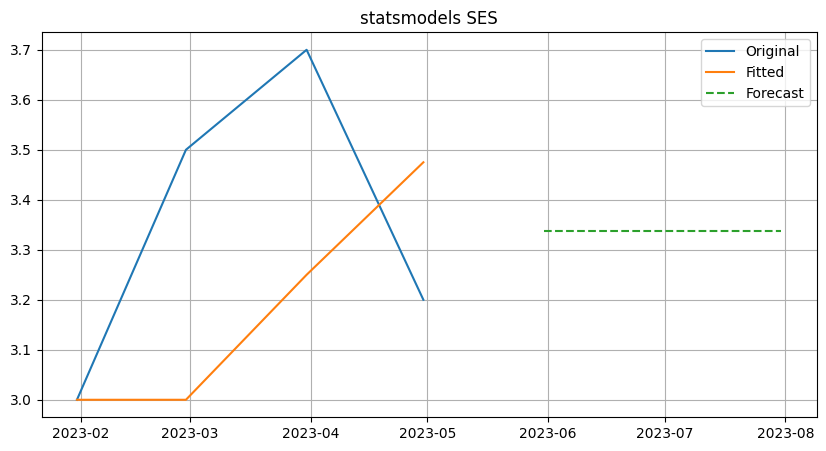

In [19]:
# ses_forecast 호출 시
data = [3.0, 3.5, 3.7, 3.2]
index = pd.date_range(start='2023-01-31', periods=4, freq='ME')
series = pd.Series(data, index=index)
plot_ses_results(series, smoothing_level=0.5, forecast_periods=3, ses_func=ses_forecast, title="statsmodels SES")
